In [ ]:
# History
# Name      Date          Description                   Issue
# Bofan     Nov 20        upload and load dataset.      file too large to load and causing crash
# Emanuel   Dec 1         removing reviews stopwords    

# 1. Preprocessing  dataset

In [ ]:
# Preprocess data: removing irrelevant features
# Includes: tokenization, case-folding, stopword removal, stem words, weight words
# Includes: tokenization, case-folding, stop word removal
# Return a ranked list of reviews 

# dataset download link: https://jmcauley.ucsd.edu/data/amazon_v2/index.html
# example name is sport and oudoor

## Bofan      load dataset

In [32]:
from os import path
import os
import pandas as pd
import numpy as np
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
# B
# dataset web address https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Sports_and_Outdoors.json.gz
#location = '/content/drive/MyDrive/CSCI626InformationRetrieval/Group/IR share/data/'


#path = 'Sports_and_Outdoors.json'
#pathgz = 'Sports_and_Outdoors.json.gz' 
sample = 'sample.csv'
# file location and name

#filenamegz = location+pathgz
#filename = location+path
#samplepath = location+sample

#### create sample.csv  shape of (1000000, 13) 

In [3]:
# generate a smaller sample dataset for futrue use
#import pandas as pd
#chunks = pd.read_json(filename, lines=True, chunksize = 10**6)
# i=0
# for c in chunks:
#     #print(c)
#     i += 1
#     print(i,"th of 10**6")
#for i in chunks:
  #df = i
  #break
# save to sample.csv in data folder
#df.to_csv(samplepath)

#### read df

In [5]:
# read and load sample.csv data
df = pd.read_csv(sample, low_memory=False)
# df.head()

In [6]:
list(df.columns)

['Unnamed: 0',
 'overall',
 'verified',
 'reviewTime',
 'reviewerID',
 'asin',
 'reviewerName',
 'reviewText',
 'summary',
 'unixReviewTime',
 'vote',
 'image',
 'style']

<AxesSubplot: >

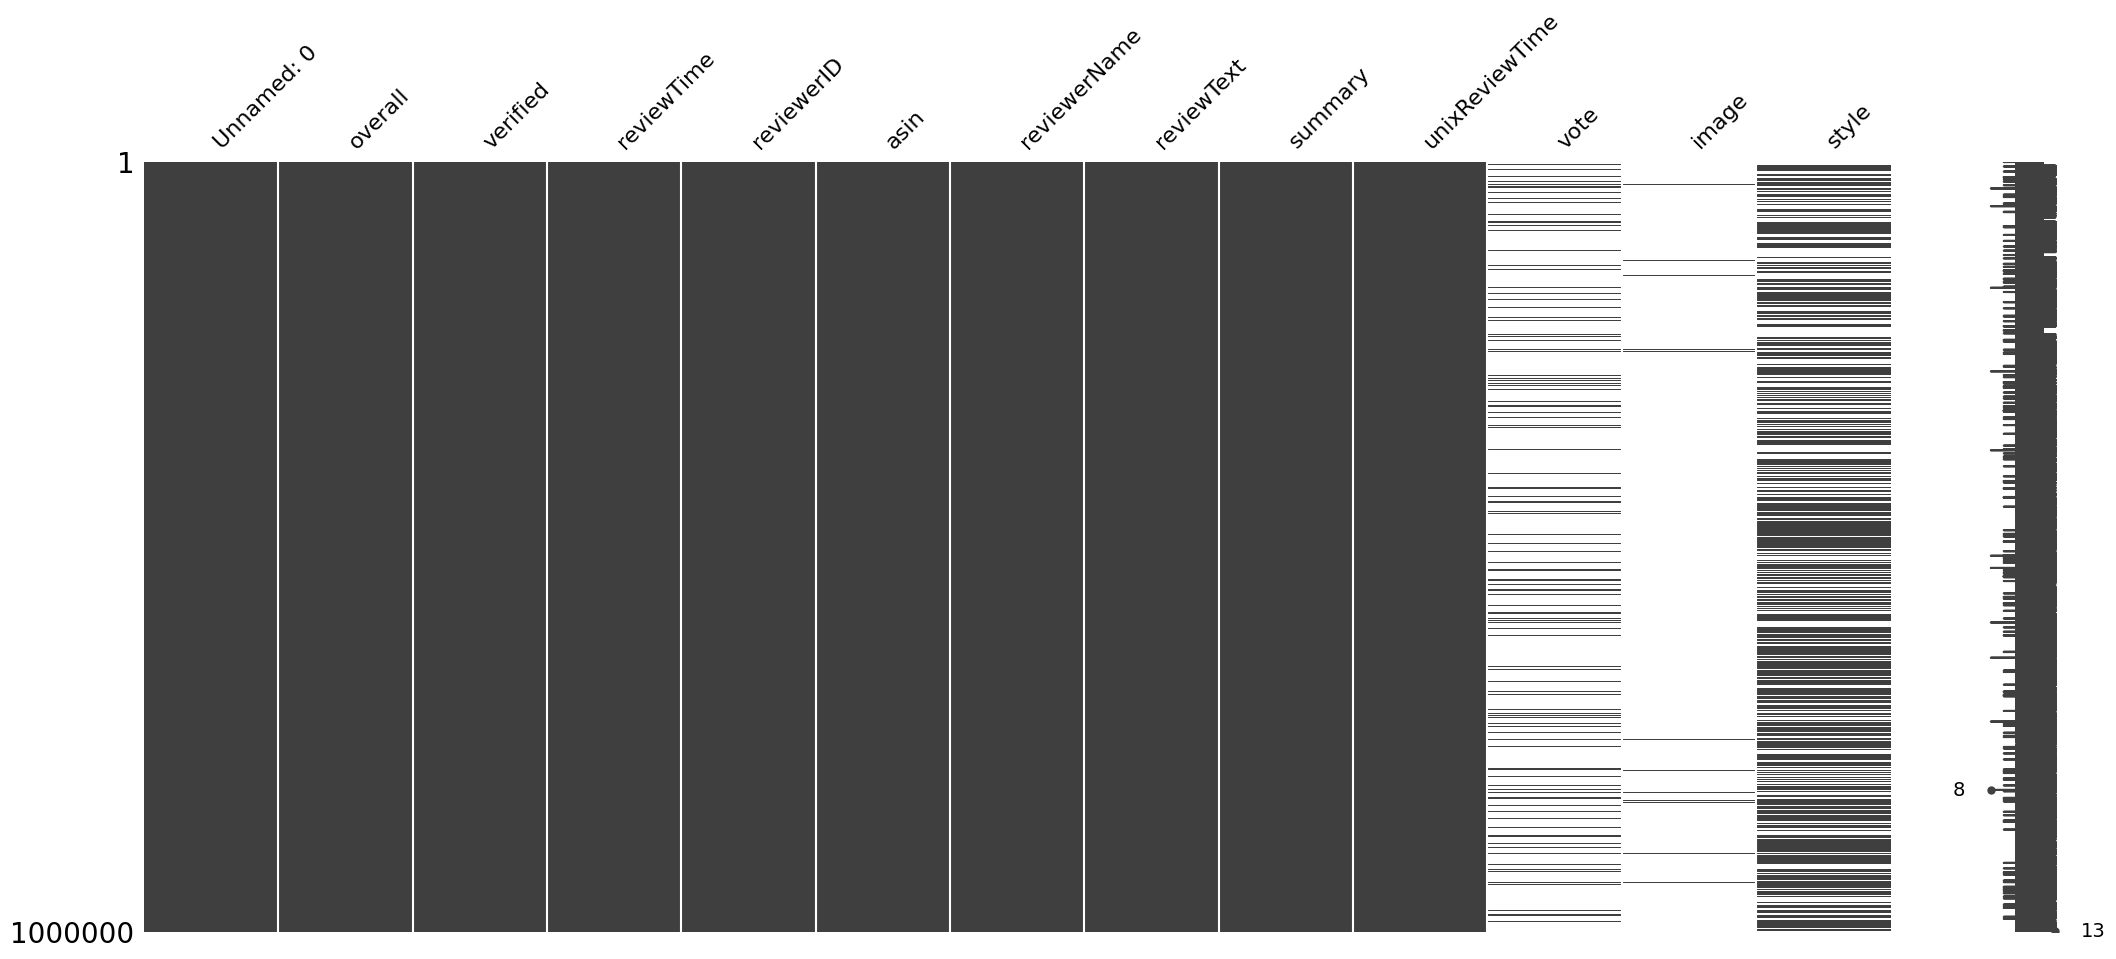

In [8]:
import pandas as pd
import missingno as msno
msno.matrix(df)

In [9]:
df = df.drop(columns=['Unnamed: 0','vote', 'image','style'])
df = df.dropna()
print(df.shape)
df = df[df.verified == True]
print(df.shape)
df = df.drop(columns=['verified','reviewTime','reviewerName'])

(999227, 9)
(928242, 9)


In [10]:
df.head()

,overall,reviewerID,asin,reviewText,summary,unixReviewTime
0,5,A2IYSO2XLF4Z84,B001MYGLJC,this is all you need for your reloading center,a great addition to your reloading center,1480377600
2,5,A4RZAXJSJQ38H,B001MYGLJC,Works like a charm! I have been running mine ...,Works like a charm,1480032000
3,5,AAB6KYNNRP6R9,B001MYGLJC,Good quality cheapest tumbler around! No compl...,Five Stars,1479513600
4,5,A1JRPDIVD7H6PS,B001MYGLJC,"Exactly what i was expecting, great piece",great,1479340800
5,5,A1B4DGTUCU2HED,B001MYGLJC,Good find,Five Stars,1479081600


In [11]:
df['overall'].value_counts()

5    607902
4    156242
3     67781
1     56427
2     39890
Name: overall, dtype: int64

In [12]:
df = df[df.overall > 3]

In [13]:
df.shape

(764144, 6)

In [14]:
df['asin'].value_counts()

B001N3MKT2    5347
B003WU9VKK    4744
B002LL0NEO    4295
B001PLG7UK    3513
B001T7QJ9O    3160
              ... 
B003LRDFZG       1
B003LUF58S       1
B002UPZD3C       1
B002UPQ9XU       1
B00295FINS       1
Name: asin, Length: 15075, dtype: int64

<AxesSubplot: >

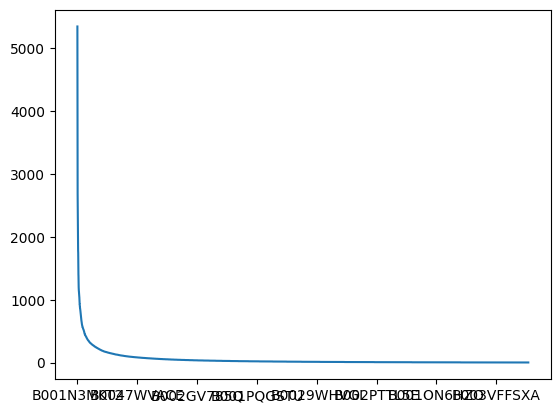

In [15]:
import matplotlib.pyplot as plt
df['asin'].value_counts().plot()

In [16]:
asin = df['asin'].value_counts()
asin = asin.to_frame()

In [17]:
asin

,asin
B001N3MKT2,5347
B003WU9VKK,4744
B002LL0NEO,4295
B001PLG7UK,3513
B001T7QJ9O,3160
...,...
B003LRDFZG,1
B003LUF58S,1
B002UPZD3C,1
B002UPQ9XU,1


<AxesSubplot: >

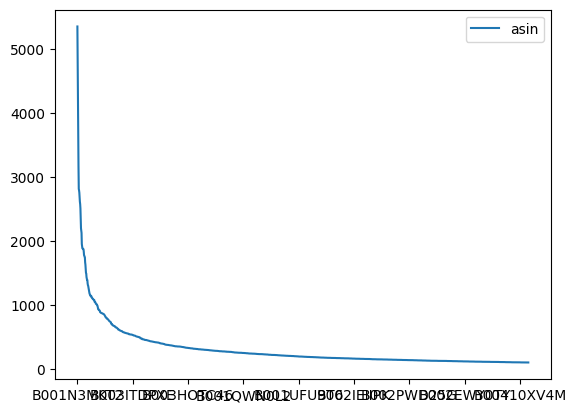

In [18]:
asin = asin[asin.asin > 100]
asin.plot()

In [19]:
asin.shape

(1631, 1)

### E

In [21]:
# E 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df = df.dropna()
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['reviewText'] = df['reviewText'].apply(word_tokenize)
df.iloc[:100]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emanuel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/emanuel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,overall,reviewerID,asin,reviewText,summary,unixReviewTime
0,5,A2IYSO2XLF4Z84,B001MYGLJC,"[need, reloading, center]",a great addition to your reloading center,1480377600
2,5,A4RZAXJSJQ38H,B001MYGLJC,"[works, like, charm, !, running, mine, 8, hour...",Works like a charm,1480032000
3,5,AAB6KYNNRP6R9,B001MYGLJC,"[good, quality, cheapest, tumbler, around, !, ...",Five Stars,1479513600
4,5,A1JRPDIVD7H6PS,B001MYGLJC,"[exactly, expecting, ,, great, piece]",great,1479340800
5,5,A1B4DGTUCU2HED,B001MYGLJC,"[good, find]",Five Stars,1479081600
...,...,...,...,...,...,...
108,5,A8Z1184GW58HJ,B001MYEU0E,"[first, edition, owned, can, not, compare, old...",Very Helpful,1369699200
109,5,A27IY071VXBSD6,B001MYEU0E,"[everything, imagine, regarding, safe, reloadi...",You want it... it's in here,1369699200
110,4,A11UMT3MKBSPW2,B001MYEU0E,"[getting, started, hobby, ,, found, data, book...",Very user friendly.,1369699200
111,5,A3F415RRE84BR1,B001MYEU0E,"[5th, lyman, manual, have, ., lists, new, powd...",This is the standard that others are judged by.,1369699200


In [23]:
# E
df_asin = df[['asin','reviewText']].copy()
df_asin

,asin,reviewText
0,B001MYGLJC,"[need, reloading, center]"
2,B001MYGLJC,"[works, like, charm, !, running, mine, 8, hour..."
3,B001MYGLJC,"[good, quality, cheapest, tumbler, around, !, ..."
4,B001MYGLJC,"[exactly, expecting, ,, great, piece]"
5,B001MYGLJC,"[good, find]"
...,...,...
999995,B004C6Q4T4,"[table, arrived, expected, functional, ., used..."
999996,B004C6Q4T4,"[purchased, outside, rv, ., folds, compact, op..."
999997,B004C6Q4T4,"[easy, set, easy, carry, closed, ., top, nice,..."
999998,B004C6Q4T4,"[needed, table, ``, game, night, '', ,, mean, ..."


In [28]:
# E
dict_asin = df_asin.set_index('asin').T.to_dict('list')
dict_asin

/var/folders/cg/52ls_8wn3bx7qsf2ppb2s6300000gn/T/ipykernel_25929/3077481213.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_asin = df_asin.set_index('asin').T.to_dict('list')


{'B001MYGLJC': [['new',
   'reloading',
   'ammunition',
   ',',
   'although',
   'ordered',
   'tumbler',
   'primarily',
   'relatively',
   'low',
   'price',
   ',',
   'completely',
   'satisfied',
   'high',
   'quality',
   'construction',
   'acceptable',
   'job',
   'cleaning',
   'used',
   'brass',
   '.',
   'little',
   'noisy',
   ',',
   'cares',
   '!',
   'put',
   'place',
   '(',
   'basement',
   '?',
   ')',
   'away',
   'living/working',
   'environment',
   'let',
   'thing',
   'number',
   'hours',
   '.',
   'even',
   'put',
   'table',
   ',',
   'creep',
   'substantial',
   'vibration',
   'uses',
   'tumble',
   'items',
   '.',
   'highly',
   'recommend',
   'item',
   '.']],
 'B001MYEU0E': [['lots',
   'good',
   'info',
   'book',
   '.',
   'book',
   'offered',
   'dillion',
   'site',
   'ordering',
   'press',
   'figured',
   'would',
   'good',
   'read',
   'get',
   'started',
   'reloading',
   '.']],
 'B001MYIX7A': [['great',
   'item',
 

In [49]:
# E
from itertools import chain
bow = []
for arr in df_asin['reviewText']:
    bow.append(arr)
bow = list(chain.from_iterable(bow))
bow = set(bow)
bow

{'deduced',
 'video-block-r2wgmdba32019r',
 'agroforesty',
 'electronics-',
 '38',
 'groin',
 'youin',
 'trusted/',
 'patch-holder',
 'panned',
 'razor-sharp',
 'gryphon',
 'debsconeag',
 'neap',
 'kwan',
 'occurrs',
 'cassual',
 'kelsie',
 'decending',
 '/reynolds-900-1000-length-x-12-width-pvc-food-wrap-film/dp/b004ng9116/ref=cm_cr_arp_d_rvw_txt',
 'cloaked',
 'mini-mule',
 'case/overall',
 'snaps/zippers',
 'gravelly',
 'stable/wide',
 'one-directional',
 '-if-',
 'amazement',
 'stoppie',
 'meowing',
 '-to-2',
 'flete',
 'verificar',
 'kenai',
 '357sig',
 'sheath/pouch',
 'excent',
 'conplaints',
 'prtico',
 "don'thave",
 'jakarta',
 '9x19',
 'telling',
 'metrostation',
 '2.5liter',
 'lake',
 'sly',
 'camping/hiking/travel',
 'becareful',
 '8-18-12',
 '4-8.5',
 'drivers/polarized/photochromic/glass',
 'glasses-they',
 'problem.would',
 'walking/driving',
 '18mo',
 'perdido',
 'atf',
 'fit/worked',
 'intersect',
 '3-7mi',
 'bic/straight',
 'overfilling',
 'pheromones',
 'evokes',
 's

In [ ]:
# B

# 2. ML architecture

In [ ]:
  # input                                                                                                                                                                                     # output  
  # ################                                                                                                                                                                          ##################################
  # (clients search# --------> word encoding (replace each text in every review) --------> dense embedding -------->       MLP of NN   -------->  choose a/ mult classifier   -------->       # (rank list of product (sentiment/ classification??)
  # key sentence)###                                                                      n-dimentions vec             as input for the NN          compare acurrancy                         # which is most relevant to search corpus)
  # existing review#                                                                                                                                 choose winning classfier/cluster         # !!!!!!relevent review's prodect ids !!!!
  # ################                                                                                                                                   for prediction model                   ##################################  
  # 
  #                                                                                                                                   -------->    choose a algorthm for sentiment
  # 

In [ ]:
# dense embedding  refer to link: https://www.tensorflow.org/text/guide/word_embeddings


#!!!! design a DN cluster that input one review and output all reviews in that group and sort by distance